# Get morphologies from Nexus

#### Imports and Nexus-Forge configuration

In [1]:
import getpass
import logging
from pathlib import Path

%matplotlib inline
import neurom.view

# Import SNAP's API for Nexus-Forge
from bluepysnap.api import Api 

logging.basicConfig(level=logging.WARNING)

Copy and paste the token from https://bbp.epfl.ch/nexus/web/

In [2]:
TOKEN = getpass.getpass()

 ·······································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································································

Configure snap (and nexus-forge) to get data from **public/hippocampus-hub**

In [3]:
ORGANIZATION = "public"
PROJECT = "hippocampus-hub"
nexus_config = "../../../examples/configurations/api/forge.yml"

api = Api(nexus_config=nexus_config, bucket=f"{ORGANIZATION}/{PROJECT}", token=TOKEN, debug=False)

#### Getting and instantiating a morphology

We can find the ~droids~ morphologies we are looking for by using their name:

In [4]:
results = api.get_entities('NeuronMorphology', {'name': 'mpg141209_B_idA'})
print(f"Found {len(results)} matching entries:")
api.as_dataframe(results).T

Found 1 matching entries:


,0
id,https://bbp.epfl.ch/neurosciencegraph/data/neu...
type,"[ReconstructedCell, Entity, NeuronMorphology, ..."
annotation.type,"[MType:Annotation, Annotation]"
annotation.hasBody.id,http://bbp.epfl.ch/neurosciencegraph/ontologie...
annotation.hasBody.type,"[MType, AnnotationBody]"
annotation.hasBody.label,SP_PC
annotation.hasBody.prefLabel,SP_PC
annotation.name,M-type Annotation
brainLocation.type,BrainLocation
brainLocation.brainRegion.id,UBERON:0014548


We could have also got the same entry by using the ID of the morphology:

In [5]:
api.get_entity_by_id('https://bbp.epfl.ch/neurosciencegraph/data/neuronmorphologies/4ea548b4-be79-4c63-beed-041a5081010a').name

'mpg141209_B_idA'

#### Downloading (instantiating) the Morphology

At this point, our `results` are still views of data from the knowledge graph. In the SNAP API, these are represented by the `Entity` class:

In [6]:
entity = results[0] # need to use [0] as get_entities returns a list
print(type(entity))

<class 'bluepysnap.api.entity.Entity'>


To be able to use the morphology, we need to instantiate it. Or, to put it another way, get the morphology instance. `entity.instance` downloads the resource, and opens it with neurom in the background:

In [7]:
morphology = entity.instance
!ls .downloaded_content/

mpg141209_B_idA.swc


We can now use the `morphology` as we normally would in NeuroM:

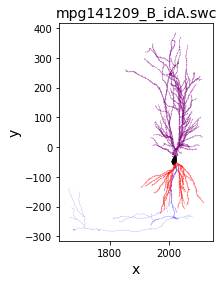

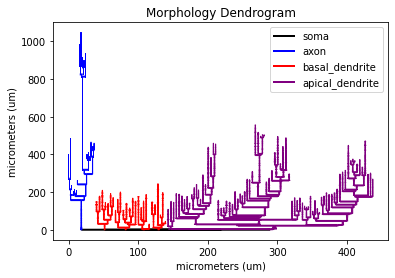

In [8]:
neurom.view.matplotlib_impl.plot_morph(morphology)
fig, ax = neurom.view.matplotlib_utils.get_figure()
neurom.view.matplotlib_impl.plot_dendrogram(morphology, ax)